<a href="https://colab.research.google.com/github/somyamangla/CANCER-PREDICTION/blob/main/Liver_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# for numerical computing
import numpy as np
# for dataframes
import pandas as pd
# for easier visualization
import seaborn as sns
# for visualization and to display plots
from matplotlib import pyplot as plt
# %matplotlib inline
# import color maps
from matplotlib.colors import ListedColormap
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

#import xgboost
import os
from xgboost import XGBClassifier
from xgboost import plot_importance  # to plot feature importance
import joblib
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split

import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection , metrics
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from openpyxl import load_workbook
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
df=pd.read_csv('/Indian_liver_patient.csv')

In [ ]:
df.shape

(583, 11)

In [ ]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [ ]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
df.dtypes[df.dtypes=='object']

Gender    object
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f46ee27fd90>,
      dtype=object)

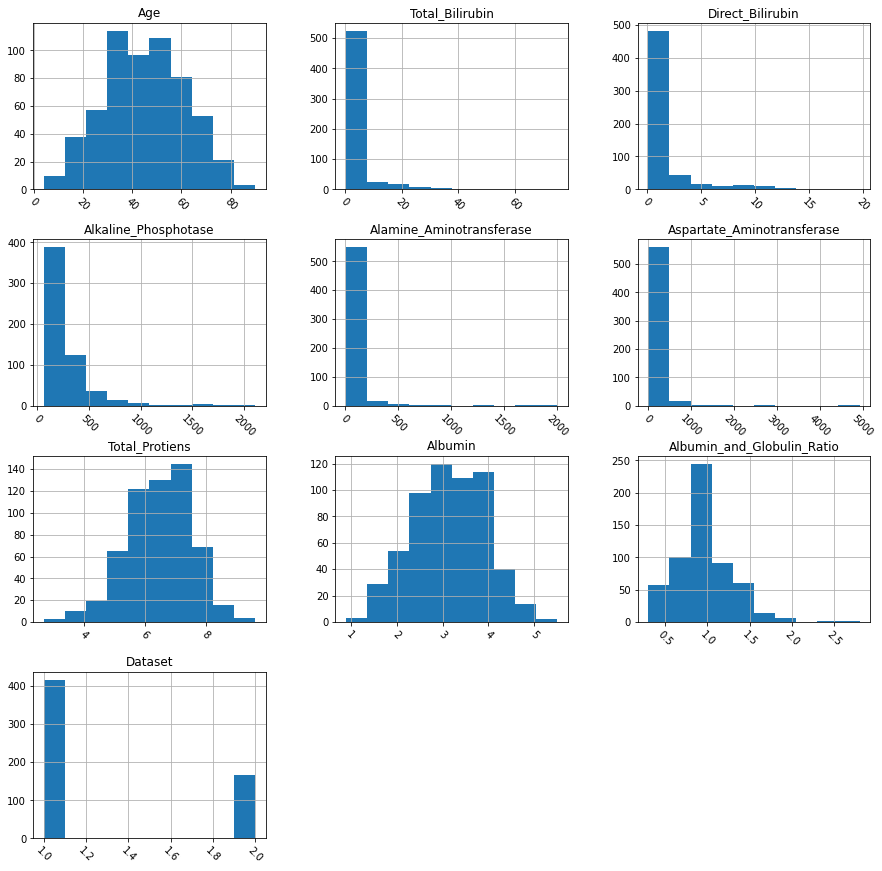

In [ ]:
# Plot histogram grid
df.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

In [ ]:
# Clear the text "residue"
plt.show()

In [ ]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [ ]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x == 2:
        return 0
    return 1

In [ ]:
df['Dataset'] = df['Dataset'].map(partition)

In [ ]:
df.describe(include=['object'])

,Gender
count,583
unique,2
top,Male
freq,441


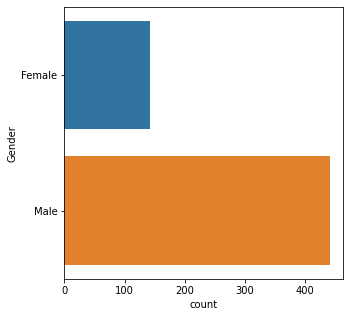

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(y='Gender', data=df)

In [ ]:
df[df['Gender'] == 'Male'][['Dataset', 'Gender']].head()

,Dataset,Gender
1,1,Male
2,1,Male
3,1,Male
4,1,Male
5,1,Male


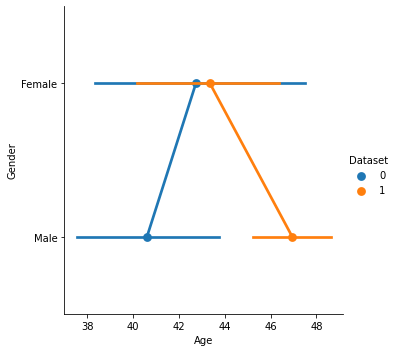

In [ ]:
sns.factorplot (x="Age", y="Gender", hue="Dataset", data=df);

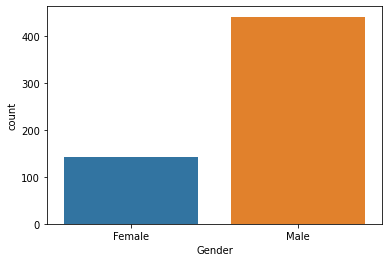

In [ ]:
sns.countplot(data=df, x = 'Gender', label='Count')

In [ ]:
M, F = df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

Number of patients that are male:  441
Number of patients that are female:  142


In [ ]:

def partition(x):
    if x =='Male':
        return 0
    return 1

In [ ]:
df['Gender'] = df['Gender'].map(partition)

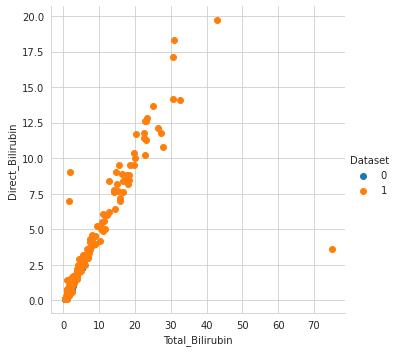

In [ ]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'Dataset', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()

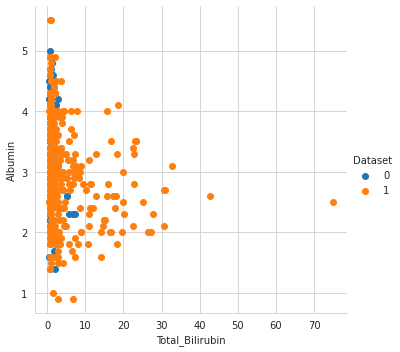

In [ ]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'Dataset', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

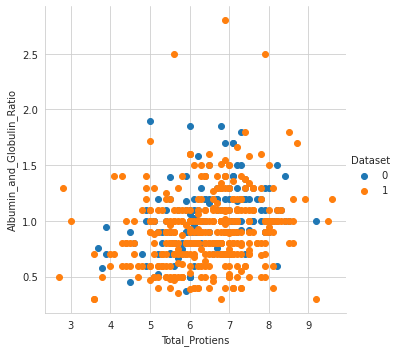

In [ ]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'Dataset', size = 5).map(plt.scatter, 'Total_Protiens', 'Albumin_and_Globulin_Ratio').add_legend()

In [ ]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


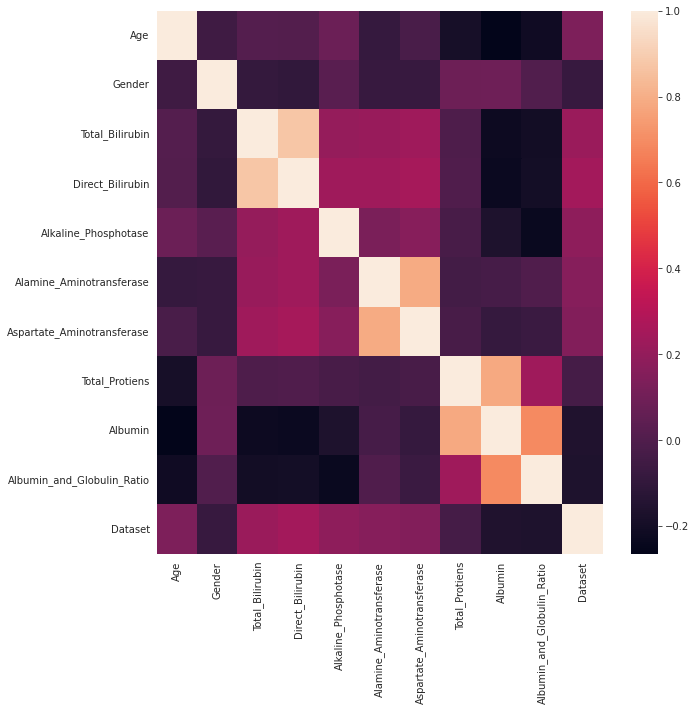

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

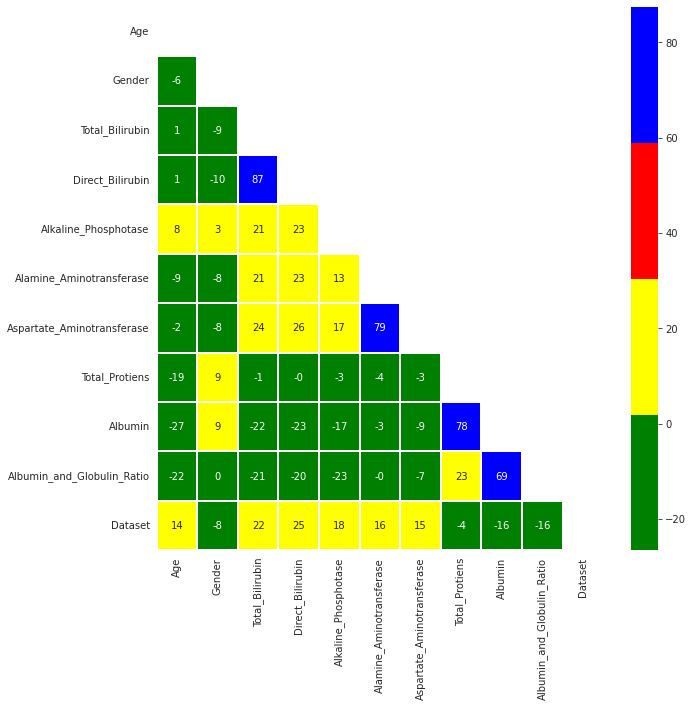

In [ ]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

In [ ]:
df = df.drop_duplicates()
print( df.shape )

(570, 11)


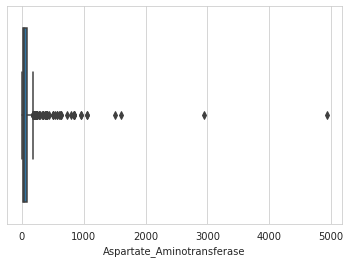

In [ ]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [ ]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [ ]:
df = df[df.Aspartate_Aminotransferase <=3000 ]
df.shape

(569, 11)

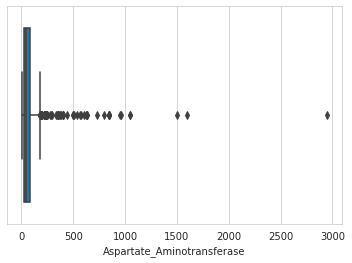

In [ ]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [ ]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [ ]:
df = df[df.Aspartate_Aminotransferase <=2500 ]
df.shape

(568, 11)

In [ ]:
df.isnull().values.any()

True

In [ ]:
df=df.dropna(how='any')

In [ ]:
df.shape

(564, 11)

In [ ]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
# Create separate object for target variable
y = df.Dataset

In [ ]:
# Create separate object for input features
X = df.drop('Dataset', axis=1)

In [ ]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234,
                                                    stratify=df.Dataset)

In [ ]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(451, 10) (113, 10) (451,) (113,)


In [ ]:
train_mean = X_train.mean()
train_std = X_train.std()

In [ ]:
## Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [ ]:
## Check for mean and std dev.
X_train.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02
mean,1.378547e-16,-8.271285e-17,-3.938707e-18,1.772418e-17,6.301931e-17,-7.877414e-18,-2.363224e-17,1.486862e-15,1.417935e-16,-3.150966e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.459710e+00,-5.980292e-01,-4.613674e-01,-5.013974e-01,-9.009611e-01,-3.943772e-01,-4.865614e-01,-3.476087e+00,-2.818030e+00,-2.023543e+00
25%,-7.595886e-01,-5.980292e-01,-3.996190e-01,-4.658144e-01,-4.636908e-01,-3.157860e-01,-4.017376e-01,-6.503894e-01,-7.121980e-01,-6.338007e-01
50%,2.975347e-02,-5.980292e-01,-3.687448e-01,-4.302314e-01,-3.270438e-01,-2.432402e-01,-3.056039e-01,7.882282e-02,3.103678e-02,1.145223e-01
75%,7.583769e-01,1.668451e+00,-1.063141e-01,-7.440091e-02,2.042996e-02,-9.814860e-02,-7.092474e-02,6.257320e-01,8.362078e-01,4.199603e-01
max,2.762091e+00,1.668451e+00,1.105471e+01,6.472879e+00,7.090935e+00,9.701578e+00,8.504762e+00,2.813368e+00,2.880103e+00,5.612406e+00


In [ ]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [ ]:
## Check for mean and std dev. - not exactly 0 and 1
X_test.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,0.109816,-0.216940,-0.062052,-0.033465,-0.048222,-0.017203,0.007819,-0.082507,-0.175052,-0.218486
std,0.937258,0.851421,0.835512,1.046110,0.734043,0.661163,0.874507,0.962887,0.922474,0.851370
min,-2.338273,-0.598029,-0.445930,-0.501397,-0.768218,-0.394377,-0.469597,-2.655723,-2.198667,-1.718105
25%,-0.577433,-0.598029,-0.399619,-0.465814,-0.444170,-0.321831,-0.401738,-0.741541,-0.836070,-0.801792
50%,0.090472,-0.598029,-0.384182,-0.430231,-0.342661,-0.261377,-0.316914,-0.012329,-0.216708,-0.190916
75%,0.940533,-0.598029,-0.198937,-0.181150,-0.018612,-0.007466,-0.034168,0.625732,0.526527,0.114522
max,1.851312,1.668451,4.231512,5.974717,3.147694,4.834965,4.263572,2.175308,2.136869,2.558026


MODEL-1: LOGISTIC REGRESSION

In [ ]:
tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2']}
model = GridSearchCV(LogisticRegression(), tuned_params, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [ ]:
model.best_estimator_

LogisticRegression(C=0.1)

In [ ]:
## Predict Train set results
y_train_pred = model.predict(X_train)

In [ ]:
## Predict Test set results
y_pred = model.predict(X_test)

In [ ]:
# Get just the prediction for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:,1]


In [ ]:
# Display first 10 predictions
y_pred_proba[:10]

array([0.62886101, 0.60635075, 0.65628802, 0.69577814, 0.45236153,
       0.97879646, 0.56694329, 0.67530199, 0.79401715, 0.50727069])

In [ ]:
i=28  ## Change the value of i to get the details of any point (56, 213, etc.)
print('For test point {}, actual class = {}, precited class = {}, predicted probability = {}'.
      format(i, y_test.iloc[i], y_pred[i], y_pred_proba[i]))

For test point 28, actual class = 1, precited class = 1, predicted probability = 0.8175521111565488


In [ ]:
confusion_matrix(y_test, y_pred).T

array([[ 1,  4],
       [31, 77]])

In [ ]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

Text(0.5, 1.0, 'Receiver Operating Characteristic')

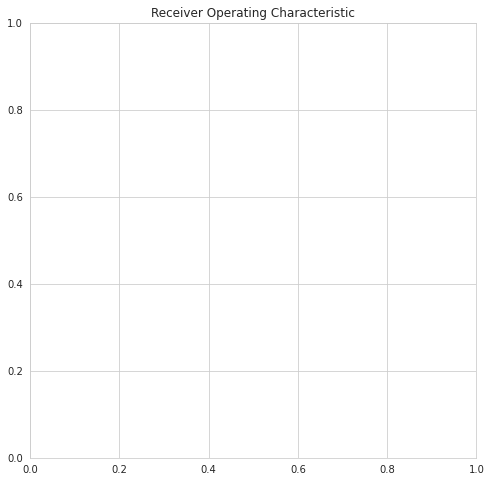

In [ ]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

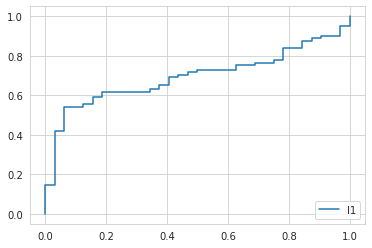

In [ ]:
# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

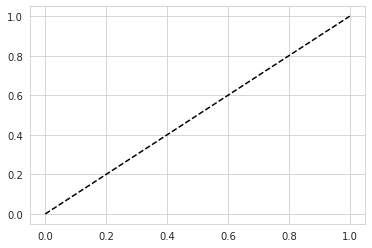

In [ ]:
# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

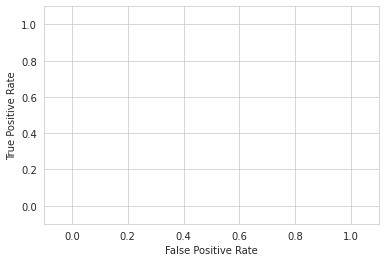

In [ ]:
# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Calculate AUC for Train set
print(roc_auc_score(y_train, y_train_pred))

0.5380781212556913


In [ ]:
# Calculate AUC for Test set
print(auc(fpr, tpr))

0.6940586419753086


In [ ]:
## Building the model again with the best hyperparameters
model = LogisticRegression(C=1, penalty = 'l2')
model.fit(X_train, y_train)

LogisticRegression(C=1)

In [ ]:
indices = np.argsort(-abs(model.coef_[0,:]))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Alamine_Aminotransferase
Direct_Bilirubin
Aspartate_Aminotransferase
Albumin
Total_Protiens
Total_Bilirubin
Alkaline_Phosphotase
Age
Gender
Albumin_and_Globulin_Ratio


MODEL-2: 
GRADIENT BOOSTING

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
#Import Library
from sklearn.ensemble import GradientBoostingClassifier
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create Gradient Boosting Classifier object
gbclass = GradientBoostingClassifier(
                    random_state = 1000,
                    verbose = 0,
                    n_estimators = 10,
                    learning_rate = 0.9,
                    loss = 'deviance',
                    max_depth = 3
                   )
#gbclass = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
# Train the model using the training sets and check score
gbclass.fit(X_train, y_train)
#Predict Output
predicted= gbclass.predict(X_test)

gbclass_score = round(gbclass.score(X_train, y_train) * 100, 2)
gbclass_score_test = round(gbclass.score(X_test, y_test) * 100, 2)
print('Score: \n', gbclass_score)
print('Test Score: \n', gbclass_score_test)
print('Accuracy: \n', accuracy_score(y_test,predicted))
print(confusion_matrix(predicted,y_test))
print(classification_report(y_test,predicted))

Score: 
 90.02
Test Score: 
 69.03
Accuracy: 
 0.6902654867256637
[[13 16]
 [19 65]]
              precision    recall  f1-score   support

           0       0.45      0.41      0.43        32
           1       0.77      0.80      0.79        81

    accuracy                           0.69       113
   macro avg       0.61      0.60      0.61       113
weighted avg       0.68      0.69      0.69       113



In [ ]:
## Predict Train results
y_train_pred = gbclass.predict(X_train)

In [ ]:
## Predict Test results
y_pred = gbclass.predict(X_test)

In [ ]:
y_pred_proba = gbclass.predict_proba(X_test)[:,1]

In [ ]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

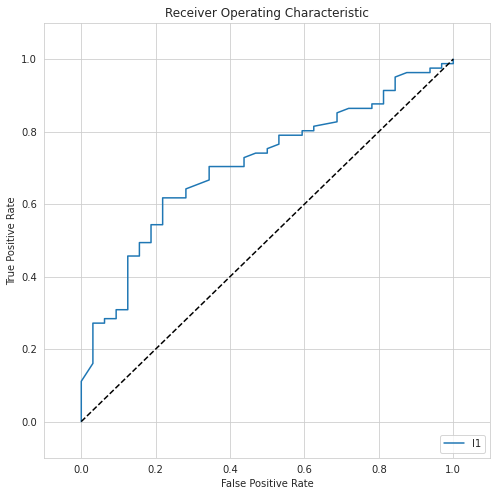

In [ ]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Calculate AUC for Train set
roc_auc_score(y_train,y_train_pred )

0.861250898634076

In [ ]:
# Calculate AUC for Test set
print(auc(fpr, tpr))

0.707175925925926


MODEL-3: XG BOOST

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier()

In [ ]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc7 = accuracy_score(y_test, y_pred)

[[11 21]
 [12 69]]


In [ ]:
print(f"By XG Boost classifier Acc: {acc7}")

By XG Boost classifier Acc: 0.7079646017699115


MODEL-4: SVM

In [ ]:
x_train = df.drop(['Dataset'],axis = 1)
x_train

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00


In [ ]:
y_train = df.Dataset
y_train

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Dataset, Length: 564, dtype: int64

Optimal number of features : 1


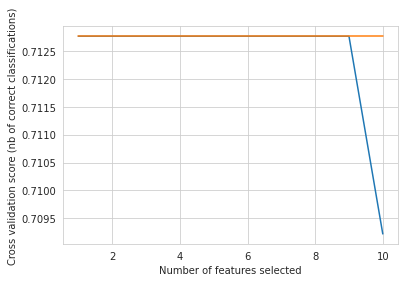

In [ ]:
svc = SVC(kernel='linear')
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2), scoring='accuracy')
rfecv.fit(x_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of Features Vs Cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
FEATURES = list(x_train.columns[rfecv.support_])
print('Best features :', FEATURES)

Best features : ['Total_Protiens']


In [ ]:
from sklearn.preprocessing import StandardScaler

def preprocess(X):
    #extracting chosen features
    X = X[FEATURES]
    #Standardizing Features
    sc = StandardScaler()
    X = sc.fit_transform(X)
    return X

x_train = preprocess(x_train)
x_train

array([[ 0.28003604],
       [ 0.92356473],
       [ 0.46390138],
       [ 0.28003604],
       [ 0.73969939],
       [ 1.0154974 ],
       [ 0.46390138],
       [ 0.18810337],
       [ 0.83163206],
       [ 0.28003604],
       [-0.54735799],
       [ 0.83163206],
       [ 0.46390138],
       [ 1.47516075],
       [-0.63929066],
       [-0.91508867],
       [ 1.0154974 ],
       [ 0.73969939],
       [ 0.28003604],
       [ 0.73969939],
       [ 0.46390138],
       [-0.08769464],
       [-2.01828071],
       [-0.45542532],
       [-1.37475202],
       [ 0.64776672],
       [-2.38601139],
       [-0.45542532],
       [-1.19088668],
       [-1.46668469],
       [-1.19088668],
       [-0.823156  ],
       [ 0.37196871],
       [ 0.64776672],
       [-2.01828071],
       [-0.63929066],
       [-0.27155998],
       [-1.28281935],
       [-1.46668469],
       [-0.36349265],
       [-0.08769464],
       [ 0.46390138],
       [ 0.00423803],
       [ 0.28003604],
       [-1.46668469],
       [-0

In [ ]:
from sklearn.svm import SVC

SV = SVC(probability=True, random_state=0) 
SV.fit(x_train, y_train)
print('SVM Classifier Training Accuracy:', SV.score(x_train, y_train))

SVM Classifier Training Accuracy: 0.7127659574468085


MODEL-5: RANDOM FOREST

In [ ]:
X = df.iloc[:,:-1]
y = df['Dataset']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 42)

In [ ]:
df.dtypes

Age                             int64
Gender                          int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_train_scaled

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.232558,1.0,0.004021,0.005102,0.061065,0.000599,0.000000,0.405797,0.304348,0.164
1,0.325581,1.0,0.002681,0.000000,0.055203,0.017365,0.011321,0.478261,0.456522,0.280
2,0.523256,1.0,0.002681,0.000000,0.059599,0.004192,0.010063,0.565217,0.434783,0.160
3,0.825581,0.0,0.084450,0.178571,0.192965,0.112575,0.083648,0.507246,0.500000,0.280
4,0.441860,1.0,0.025469,0.051020,0.111871,0.011377,0.018239,0.202899,0.195652,0.160
...,...,...,...,...,...,...,...,...,...,...
446,0.697674,0.0,0.013405,0.020408,0.114802,0.012575,0.045912,0.652174,0.369565,0.080
447,0.186047,1.0,0.002681,0.005102,0.067904,0.001198,0.001887,0.492754,0.456522,0.240
448,0.395349,0.0,0.008043,0.010204,0.074744,0.006587,0.008805,0.666667,0.760870,0.480
449,0.627907,1.0,0.017426,0.035714,0.895457,0.030539,0.045912,0.768116,0.652174,0.260


In [ ]:
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)
X_test_scaled

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.304348,0.0,0.006601,0.005495,0.145563,0.012717,0.011947,0.320755,0.257143,0.214286
1,0.391304,0.0,0.009901,0.005495,0.100698,0.018497,0.011947,0.830189,0.742857,0.428571
2,0.550725,0.0,0.013201,0.005495,0.084746,0.021965,0.082437,0.660377,0.657143,0.428571
3,0.797101,0.0,0.009901,0.005495,0.094716,0.020809,0.026284,0.622642,0.571429,0.357143
4,0.536232,1.0,0.013201,0.010989,0.042871,0.002312,0.019116,0.716981,0.600000,1.000000
...,...,...,...,...,...,...,...,...,...,...
108,0.289855,0.0,0.049505,0.043956,0.097707,0.016185,0.062127,0.792453,0.828571,0.571429
109,0.637681,0.0,0.174917,0.159341,0.562313,0.197688,0.324970,0.396226,0.257143,0.192857
110,0.521739,0.0,0.990099,0.774725,0.187438,0.063584,0.139785,0.301887,0.200000,0.142857
111,0.710145,1.0,0.009901,0.005495,0.057827,0.012717,0.004779,0.622642,0.685714,0.714286


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
from sklearn import model_selection , metrics

In [ ]:
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score

In [ ]:
prediction = model.predict(X_test)
prediction

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
accuracy = metrics.accuracy_score(y_test,prediction)
accuracy

0.7272727272727273

MODEL-6: KNN MODEL

In [ ]:
X = np.array(df.iloc[:, 1:])
y = np.array(df['Dataset'])

[[ 32  21]
 [ 36 109]]
Accuracy score of train KNN
100.0
Accuracy score of test KNN
71.21212121212122
[[ 32  21]
 [ 44 101]]
Accuracy score of train KNN
93.98907103825137
Accuracy score of test KNN
67.17171717171718
[[ 32  21]
 [ 34 111]]
Accuracy score of train KNN
94.80874316939891
Accuracy score of test KNN
72.22222222222221
[[ 32  21]
 [ 36 109]]
Accuracy score of train KNN
94.53551912568307
Accuracy score of test KNN
71.21212121212122
[[ 32  21]
 [ 35 110]]
Accuracy score of train KNN
94.26229508196722
Accuracy score of test KNN
71.71717171717171
[[ 32  21]
 [ 36 109]]
Accuracy score of train KNN
93.16939890710383
Accuracy score of test KNN
71.21212121212122
[[ 32  21]
 [ 36 109]]
Accuracy score of train KNN
94.26229508196722
Accuracy score of test KNN
71.21212121212122
[[ 32  21]
 [ 37 108]]
Accuracy score of train KNN
92.89617486338798
Accuracy score of test KNN
70.70707070707071
[[ 32  21]
 [ 36 109]]
Accuracy score of train KNN
93.44262295081968
Accuracy score of test KNN
71.2

Text(0, 0.5, 'Accuracy')

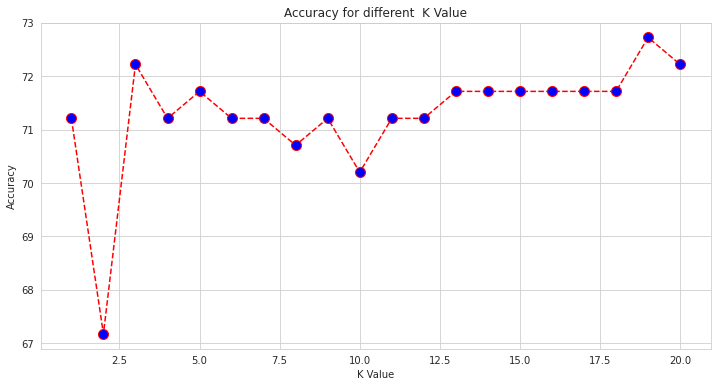

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 42)

# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#principle component analysis

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_variance=pca.explained_variance_ratio_

# Fitting KNN to the Training set

from sklearn.neighbors import KNeighborsClassifier
knn = []
for i in range(1,21):
            
    classifier = KNeighborsClassifier(n_neighbors=i)
    trained_model=classifier.fit(X_train,y_train)
    trained_model.fit(X_train,y_train )
    
    # Predicting the Test set results
    
    y_pred = classifier.predict(X_test)
    
    # Making the Confusion Matrix
    
    from sklearn.metrics import confusion_matrix
    
    cm_KNN = confusion_matrix(y_test, y_pred)
    print(cm_KNN)
    print("Accuracy score of train KNN")
    print(accuracy_score(y_train, trained_model.predict(X_train))*100)
    
    print("Accuracy score of test KNN")
    print(accuracy_score(y_test, y_pred)*100)
    
    knn.append(accuracy_score(y_test, y_pred)*100)
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 21),knn, color='red', linestyle='dashed', marker='o',  
             markerfacecolor='blue', markersize=10)
plt.title('Accuracy for different  K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy') 

MODEL-7: LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 7)

In [ ]:
LR = LinearRegression()

LR.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_prediction =  LR.predict(X_test)
y_prediction

array([ 1.00000000e+00,  7.03083727e-16,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  2.52990852e-16,  1.00000000e+00,
        1.03355303e-15,  1.00000000e+00,  1.00000000e+00,  3.39415729e-16,
        1.00000000e+00,  1.00000000e+00,  6.73016884e-16,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  3.84431110e-16,
        1.00000000e+00,  1.41964979e-15,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00, -6.72437140e-16,  4.57359638e-16,
        9.84234476e-16,  4.77236275e-16,  1.00000000e+00,  7.29131498e-16,
        4.27788014e-16,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  5.06080130e-16,
        1.00000000e+00,  1.36565580e-16,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  2.15017470e-16,  1.00000000e+00,  1.00000000e+00,
        2.82780348e-15,  

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_prediction)

In [ ]:
Accuracy=r2_score(y_test,y_prediction)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 100.00


MODEL-8: NAIVE BAYES

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 42   0]
 [  0 128]]


In [ ]:
acc4 = accuracy_score(y_test, y_pred)
print(f"Accuracy score : {acc4}")

Accuracy score : 1.0
